In [18]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
#plotly.tools.set_credentials_file(username='zxie', api_key='oLmI9wJlYJkc1cElAHP5')
#py.sign_in('zxie', 'oLmI9wJlYJkc1cElAHP5')
import networkx as nx

In [47]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A =  np.array([[0, 1, 0, 0, 1], [0, 0, 1, 1, 1],[1, 1, 0, 1, 0]])
A_sparse = sparse.csr_matrix(A)

similarities = 1 - cosine_similarity(A_sparse)
G = nx.from_numpy_matrix(similarities)
pos = nx.spring_layout(G)

'''
G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d
        
p=nx.single_source_shortest_path_length(G,ncenter)
'''
pos

{0: array([ 0.84815975,  0.        ]),
 1: array([ 0.43879503,  1.        ]),
 2: array([ 0.       ,  0.2986616])}

In [48]:
edge_trace = Scatter(
    x=[], 
    y=[], 
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[], 
    y=[], 
    text=[],
    mode='markers', 
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[], 
        size=10,         
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

KeyError: 'pos'

In [23]:
for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_trace['marker'].size = 20
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

In [24]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False, 
                width=650,
                height=650,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

plotly.offline.plot(fig, filename='networkx.html')

'file:///Users/zhihuixie/networkx.html'

In [38]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A =  np.array([[0, 1, 0, 0, 1], [0, 0, 1, 1, 1],[1, 1, 0, 1, 0]])
A_sparse = sparse.csr_matrix(A)

similarities = 1 - cosine_similarity(A_sparse)
G = nx.from_numpy_matrix(similarities)
print G.nodes()
print G.edges()

[0, 1, 2]
[(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]


In [45]:
import networkx as nx
import numpy as np
import string

dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('/tmp/out.png', format='png', prog='neato')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

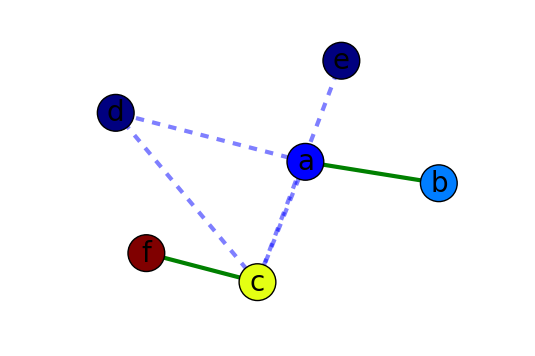

In [73]:
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.1)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]


weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700, node_color = weights)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=3,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=3,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

pairwise dense output:
 [[ 1.          0.40824829  0.40824829]
 [ 0.40824829  1.          0.33333333]
 [ 0.40824829  0.33333333  1.        ]]

pairwise sparse output:
   (0, 1)	0.408248290464
  (0, 2)	0.408248290464
  (0, 0)	1.0
  (1, 0)	0.408248290464
  (1, 2)	0.333333333333
  (1, 1)	1.0
  (2, 1)	0.333333333333
  (2, 0)	0.408248290464
  (2, 2)	1.0

index
[ 0.40824829  0.40824829  1.        ] <type 'numpy.ndarray'>
[1 2 0 0 2 1 1 0 2] <type 'numpy.ndarray'>
[0 3 6 9] <type 'numpy.ndarray'>
[0, 1, 2]
[(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]


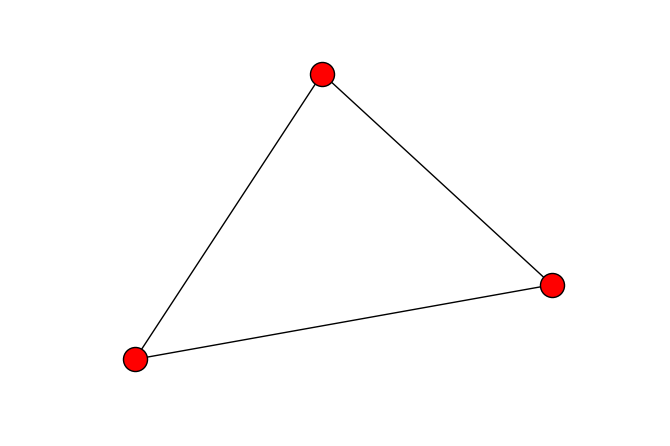

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A =  np.array([[0, 1, 0, 0, 1], [0, 0, 1, 1, 1],[1, 1, 0, 1, 0]])
A_sparse = sparse.csr_matrix(A)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))
print'index'
value = similarities_sparse[0].data
column_index = similarities_sparse.indices
row_pointers = similarities_sparse.indptr
print value, type(value)
print column_index, type(column_index)
print row_pointers, type(row_pointers)
g = nx.Graph(similarities_sparse)
print g.nodes()
print g.edges()
nx.draw(g)
plt.show()

In [74]:
import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline

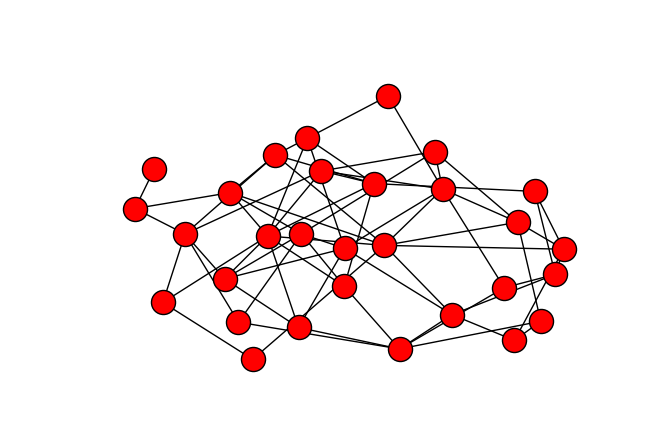

In [77]:
G = nx.erdos_renyi_graph(30,4.0/30)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(30,4.0/30)
plt.figure(figsize=(6,4));
nx.draw(G)

In [78]:
for ix,deg in G.degree().items():
    G.node[ix]['degree'] = deg
    G.node[ix]['parity'] = (1-deg%2)

for ix,katz in nx.katz_centrality(G).items():
    G.node[ix]['katz'] = katz

G.nodes(data=True)[:5]

[(0, {'degree': 7, 'katz': 0.22435156651929408, 'parity': 0}),
 (1, {'degree': 3, 'katz': 0.1460444643428618, 'parity': 0}),
 (2, {'degree': 2, 'katz': 0.13352263147513144, 'parity': 1}),
 (3, {'degree': 3, 'katz': 0.15262575353884547, 'parity': 0}),
 (4, {'degree': 4, 'katz': 0.18033982611526664, 'parity': 1})]

In [6]:
nx.write_gml(G, 'garph.gml')
graph = nx.read_gml('test.gml')
def get_node_index(nodes, node_id):
    for index, node in enumerate(nodes):
        if node["id"] == node_id:
            return index
    raise IndexError
nodes = [{
        "name": data.get("name") or "(Null)",

        "x": data["graphics"]["x"],
        "y": data["graphics"]["y"],
        "w": data["graphics"]["w"],
        "h": data["graphics"]["h"],
        "weight": data["weight"],
        "fixed": True,
    } for _, data in graph.nodes(data=True)]

links = [{
        "source": get_node_index(nodes, source),
        "target": get_node_index(nodes, target),
        "name": data["label"],
        "value": data["value"]
    } for source, target, data in graph.edges(data=True)]

json.dump({
        "nodes": nodes,
        "links": links
    }, open("g.json", "w"), indent=4)

NameError: name 'G' is not defined

In [79]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(G)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [100]:
import json
import requests
from lxml import html

BASE_URL = "https://en.wikipedia.org"
LIST_URL = "%s/wiki/List_of_programming_languages" % BASE_URL

ATTRIBUTES = ["Influenced", "Influenced by", "OS", "License",
              "Paradigm(s)", "Appeared in", "Developer", "Designed by",
              "Website", "Dialects", "Major implementations",
              "Typing discipline", "Implementation language", "Developer"]

LINK_ATTRS = ["Website"]


def normalize_data(value):
    # remove citations
    value = ''.join([
        part.split('[')[0]
        for part in value.split(']')])
    value = value.replace("&quot;", "")

    # remove needless data
    value = value.replace('Multi-paradigm:', '')

    # strip white spaces
    value = value.strip()

    # remove relative years
    if 'years ago' in value:
        value = value.split(';')[0]

    return value


def normalize_conjunctions(value):
    return (value.replace(' and ', ', ')
                 .replace(' & ', ','))


def fetch_details(url):
    details = {}
    source = requests.get(url).content
    doc = html.fromstring(source)
    rows = doc.cssselect(".infobox tr")

    if not rows:
        return details

    for row in rows:
        try:
            header = row.cssselect("th")[0]
        except IndexError:
            continue

        attribute = header.text_content().strip()

        if not attribute in ATTRIBUTES:
            continue

        data = row.cssselect("td")[0]

        if attribute in LINK_ATTRS:
            details[attribute] = [link.attrib['href']
                                  for link in data.cssselect("a")]
            continue

        splitter = '\n' if not ',' in data.text_content() else ','

        content = normalize_conjunctions(data.text_content()).split(splitter)

        normalized = map(normalize_data, content)

        details[attribute] = normalized

    return details


def main():
    result = {}
    source = requests.get(LIST_URL).content
    doc = html.fromstring(source)
    for link in doc.cssselect("table.multicol td a"):
        try:
            details = fetch_details(BASE_URL + link.attrib['href'])
            print 'test'
            result[link.text] = details
            print link.text
        except Exception as e:
            print 'error'
            print e
    
    json.dump(result, open('data.json', 'w'))


if __name__ == "__main__":
    main()

In [11]:
import networkx as nx
import json
def get_node_index(nodes, node_id):
    for index, node in enumerate(nodes):
        if node["id"] == node_id:
            return index
    raise IndexError
graph = nx.read_gml('test.gml')
nodes = [{
        "name": data.get("name") or "(Null)",
        "id": data['id'],
        "x": data["graphics"]["x"],
        "y": data["graphics"]["y"],
        "w": data["graphics"]["w"],
        "h": data["graphics"]["h"],
        "fixed": True,
    } for _, data in graph.nodes(data=True)]

links = [{
        "source": get_node_index(nodes, source),
        "target": get_node_index(nodes, target),
        "value": data["value"]
    } for source, target, data in graph.edges(data=True)]

json.dump({
        "nodes": nodes,
        "links": links
    }, open("test.json", "w"), indent=4)